In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle

from alibi.explainers import ALE
from alibi.explainers import plot_ale


X = np.load('day_X.npy')
y = np.load('day_y.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

file = open('bike_rentals_rf_np', 'rb')
regr = pickle.load(file)
file.close()

y_test_hat = regr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat))

157.5940220620002

In [2]:
ale = ALE(regr.predict,
          #feature_names=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'],
          #target_names=['Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Working day', 'Weather', 'Temperature', 'ATemperature', 'Humidity', 'Wind speed', 'Casual', 'Registered'],
         )

In [3]:
grid_points = {7: np.linspace(0, 1.0, 20), 9: np.linspace(0, 1.0, 10)}
exp = ale.explain(np.array(X),
                  features=[7],
                  grid_points=grid_points,
                 )

The leading bins of feature 7 defined by the grid-points do not contain any feature values. Automatically removing the empty leading bins to ensure that each bin contains at least one feature value.
The ending bins of feature 7 defined by the grid-points do not contain any feature values. Automatically removing the empty ending bins to ensure that each bin contains at least one feature value.


array([[<Axes: xlabel='f_7', ylabel='ALE'>]], dtype=object)

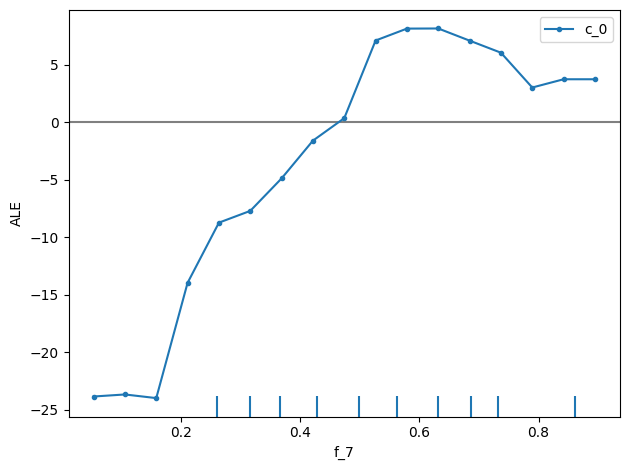

In [4]:
plot_ale(exp)